In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d)) # 2 x 2 diagonal matrix

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [16]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    dxm = X - mean # 100 x 2
    exponent = -0.5 * np.diag(dxm @ np.linalg.inv(sigma) @ dxm.T)
    return exponent - np.log(2*np.pi)*(d/2) - np.log(np.linalg.det(sigma))*0.5

In [17]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

In [18]:
log_ps[0].shape

(100,)

In [19]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


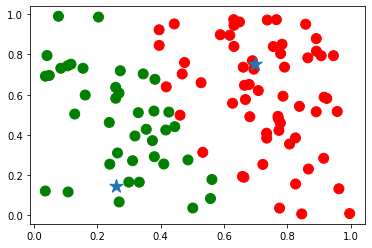

In [20]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()

In [10]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    dxm = X - mean # 100 x 2
    exponent = -0.5 * np.sum(dxm @ np.linalg.inv(sigma) @ dxm.T, axis=1)
    return exponent - np.log(2*np.pi)*(d/2) - np.log(np.linalg.det(sigma))*0.5

In [11]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    dxm = X - mean # 100 x 2
    partial = dxm @ np.linalg.inv(sigma) # 100x2
    exponent = np.sum(partial * dxm, axis=1) # 100
    return exponent - np.log(2*np.pi)*(d/2) - np.log(np.linalg.det(sigma))*0.5

In [12]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

In [13]:
log_ps[0].shape

(100,)

In [14]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1]


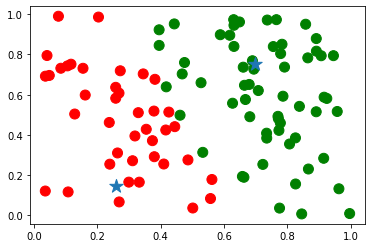

In [15]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()